In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, io, filters

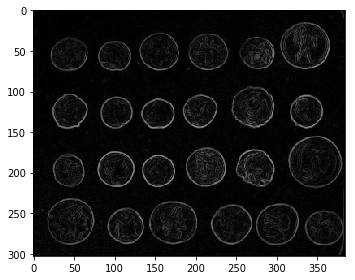

In [6]:
image = data.coins()  # or any NumPy array!
edges = filters.sobel(image)
io.imshow(edges)

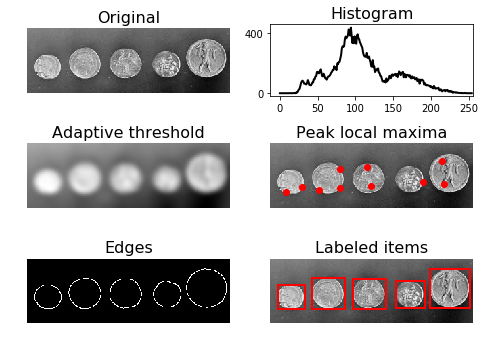

In [38]:
# Load a small section of the image.
image = data.coins()[0:95, 70:370]

fig, axes = plt.subplots(ncols=2, nrows=3,figsize=(8, 6))
ax0, ax1, ax2, ax3, ax4, ax5  = axes.flat
ax0.imshow(image, cmap=plt.cm.gray)
ax0.set_title('Original', fontsize=16)
ax0.axis('off')

# Histogram.
values, bins = np.histogram(image,
                            bins=np.arange(256))

ax1.plot(bins[:-1], values, lw=2, c='k')
ax1.set_xlim(xmax=256)
ax1.set_yticks([0, 400])
ax1.set_aspect(.2)
ax1.set_title('Histogram', fontsize=16)

# Apply threshold.
bw = filters.threshold_local(image,25)

ax2.imshow(bw, cmap=plt.cm.gray)
ax2.set_title('Adaptive threshold', fontsize=16)
ax2.axis('off')

# Find maxima.
from skimage.feature import peak_local_max

coordinates = peak_local_max(image, min_distance=20)

ax3.imshow(image, cmap=plt.cm.gray)
ax3.autoscale(False)
ax3.plot(coordinates[:, 1],coordinates[:, 0],'.', markersize=12,c='r')
ax3.set_title('Peak local maxima', fontsize=16)
ax3.axis('off')

# Detect edges.
from skimage.feature import canny
edges = canny(image, sigma=3,
                     low_threshold=10,
                     high_threshold=80)

ax4.imshow(edges, cmap=plt.cm.gray)
ax4.set_title('Edges', fontsize=16)
ax4.axis('off')

# Label image regions.
from skimage.measure import regionprops
import matplotlib.patches as mpatches
from skimage.morphology import label

label_image = label(edges)

ax5.imshow(image, cmap=plt.cm.gray)
ax5.set_title('Labeled items', fontsize=16)
ax5.axis('off')

for region in regionprops(label_image):
    # Draw rectangle around segmented coins.
    minr, minc, maxr, maxc = region.bbox
    rect = mpatches.Rectangle((minc, minr),
                              maxc - minc,
                              maxr - minr,
                              fill=False,
                              edgecolor='red',
                              linewidth=2)
    ax5.add_patch(rect)